In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

In [143]:
data = pd.read_csv('data.csv')

In [144]:
data.dtypes

group_name    object
bin            int64
value          int64
dtype: object

In [145]:
index_map = {2000:0,
            2001:1,
            2005:2,
            2007:3,
            2008:4,
            2010:5}

In [146]:
def bar_group_alpha_mean_plot(df,
                              groups=None,
                              ind_map = None,
                              figsize=(10,7),
                              interp_x = np.arange(1,20,0.1),
                             title = 'Alpha bar for groups with mean interpolation plot'):
    if ind_map:
        df['bin'] = df['bin'].apply(lambda x: ind_map[x])
    if groups:
        for k,v in groups.items():
            groups_mean = df[df['group_name'].isin(v)].copy()
            groups_mean = groups_mean.groupby('bin')['value'].mean().reset_index()
            groups_interp = interp1d(groups_mean['bin'],groups_mean['value'],kind='cubic')
            fig, ax = plt.subplots(figsize=figsize)
            for val in v:
                df_plot = df[df['group_name'] == val]
                bar = ax.bar(df_plot['bin'],df_plot['value'],alpha=0.2,color='green')
                if ind_map:
                    ax.set_xticks(list(ind_map.values()))
                    ax.set_xticklabels(ind_map.keys())
            bar.set_label(str(k))
            plt.plot(interp_x,groups_interp(interp_x),label='Cubic interpolation')
            plt.title(title)
            plt.legend()
            plt.show()

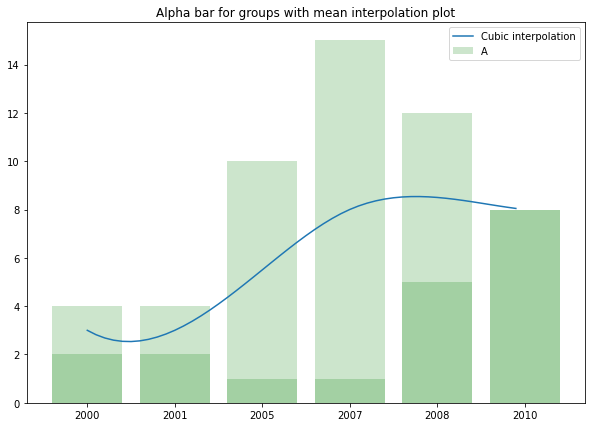

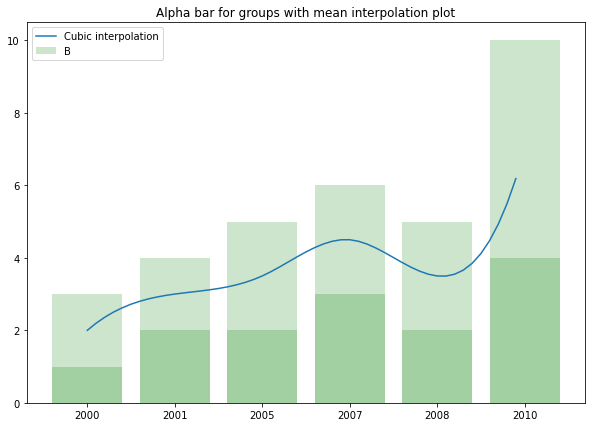

In [147]:
bar_group_alpha_mean_plot(data,
                          groups={'A':['Alpha', 'Beta'],'B':['Gamma', 'Delta']},
                          ind_map = index_map,
                          interp_x=np.arange(0,5,0.1))